# Store Exploratory Analysis and Sales Forecast

## 1. Business Understanding

### 1.1. Overview and Findings

### 1.2. Aim

### 1.3. Requirements

### 1.4. Plan

## 2. Data Understanding

* Id - an Id that represents a (Store, Date) duple within the test set
* Store - a unique Id for each store
* Sales - the turnover for any given day (this is what you are predicting)
* Customers - the number of customers on a given day
* Open - an indicator for whether the store was open: 0 = closed, 1 = open
* StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on * * public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* StoreType - differentiates between 4 different store models: a, b, c, d
* Assortment - describes an assortment level: a = basic, b = extra, c = extended
* CompetitionDistance - distance in meters to the nearest competitor store
* CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* Promo - indicates whether a store is running a promo on that day
* Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

### 2.1 Load Data

In [3]:
# import lybriries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
#load store details
store_details = pd.read_csv("./Data/store.csv")
store_details.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [30]:
#load train data
train = pd.read_csv("./Data/train.csv")
train.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_26512\1372570245.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("./Data/train.csv")


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [31]:
# join the two datasets

combined_dataset = pd.merge(train, store_details, on ='Store')
combined_dataset.head()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### 2.2 Inspect Data

In [32]:
# Get the number of rows in the dataset
num_records = combined_dataset.shape[0]
print(f'The dataset contains {num_records} records.')


The dataset contains 1017209 records.


In [33]:
# Get the number of columns in the dataset
num_columns = combined_dataset.shape[1]
print(f'The dataset contains {num_columns} columns.')


The dataset contains 18 columns.


In [34]:
column_data_types = combined_dataset.dtypes
print(column_data_types)

Store                          int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object


**Observation:**
* The dataset have **1017209 records/rows**. 
* The dataset have 18 columns.
* The column Date should be of a type datetime:

      we we proceed by transforming the type of this column into datetime using to_datetime

In [28]:
#Let's inspect the dataset and see the datetypes
combined_dataset['Date'] =  pd.to_datetime(combined_dataset['Date'])
combined_dataset['Sales'] = combined_dataset['Sales'].astype(float)

print(combined_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  float64       
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

We proceed the data prepation cheching the period that the dataset cover, as we see this dataset covers a period between **beggining of 2013 to July of 2025**.

In [10]:
print(" This analysis is between ", combined_dataset['Date'].min(), "  and ", combined_dataset["Date"].max())

 This analysis is between  2013-01-01 00:00:00   and  2015-07-31 00:00:00


#### 2.2.1 Inspecting missing values

the graph gives us a clear indication that the columns CompetitionOpenSinceMonth, CompetitionOpenSinceYear  , Promo2SinceWeek, Promo2SinceYear and  PromoInterval are the columns with more missing values

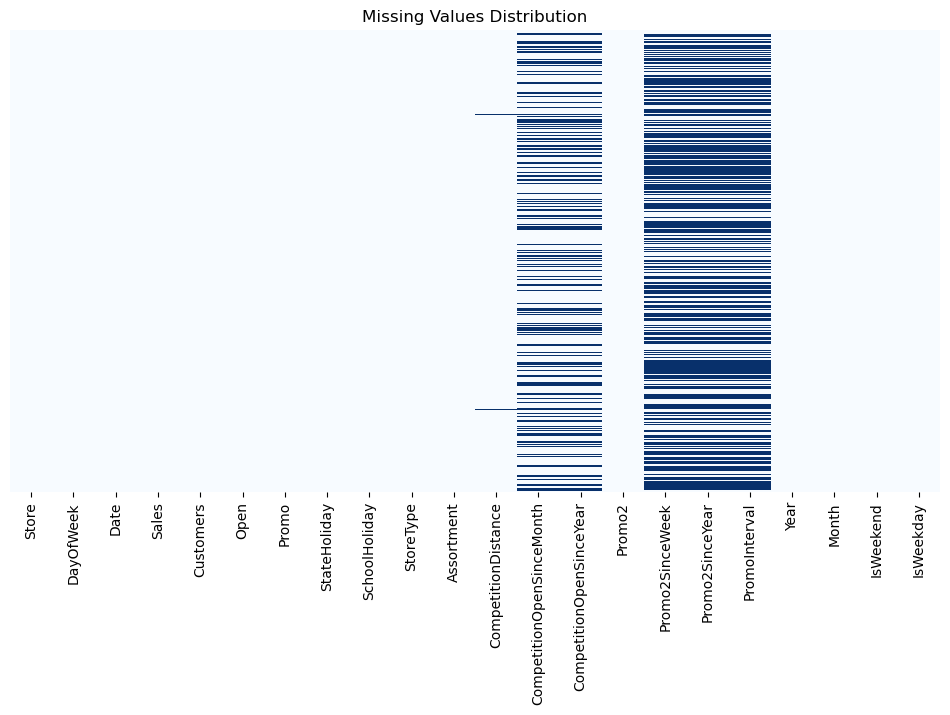

In [9]:
plt.figure(figsize=(12, 6))
sns.heatmap(combined_dataset.isnull(), cbar=False, cmap='Blues', yticklabels=False)
plt.title("Missing Values Distribution")
plt.show()

In [8]:
# We create new columns Year, Month, DatOfWeek and variables that will identify weekdays and weekends
combined_dataset['Year'] = combined_dataset['Date'].dt.year
combined_dataset['Month'] = combined_dataset['Date'].dt.month

# since the dataset description does not describe the first day of the ween we will procees to replace
#we will extract the day of the week from the Date Column
combined_dataset['DayOfWeek'] = combined_dataset['Date'].dt.dayofweek  # 0=Monday, 6=Sunday

# Create Weekend and Weekday columns
combined_dataset['IsWeekend'] = combined_dataset['DayOfWeek'] >= 5  # True for Saturday (5) and Sunday (6)
combined_dataset['IsWeekday'] = ~combined_dataset['IsWeekend']      

In [10]:
# check for missing values
combined_dataset.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
Year                              0
Month                             0
IsWeekend                         0
IsWeekday                         0
dtype: int64

Lets proceed with our inspection, by looking and the unique values of each column we are able to have, throgh this inspection we are able to see that: - StateHolida: this coulmn should take 4 categories: 
    -
    

- Lets proceed with our inspection, by looking and the unique values of each column we are able to have, throgh this inspection we are able to see that: 
  - StateHolida: this coulmn should take 4 categories: 
    - 'a' = public holiday
    - 'b' = Easter holiday
    - 'c' = Christmas
    - '0' = None
    - please notice that the value 0 that represents None should be inputed as a string and not a number, when we look at the distinct values of the StateHoliday column we see that at least one observation was inputed or recorded as a number and we proceed correcting this for forther analysis.


In [11]:
# unique values in dataset
columns = list(combined_dataset.columns)
columns.remove('Date')
columns.remove('CompetitionDistance')
for col in columns:
    print(col,"-------->",combined_dataset[col].unique())

Store --------> [   1    2    3 ... 1113 1114 1115]
DayOfWeek --------> [4 3 2 1 0 6 5]
Sales --------> [ 5263.  6064.  8314. ...   660. 17815. 23303.]
Customers --------> [ 555  625  821 ... 3900   36 4065]
Open --------> [1 0]
Promo --------> [1 0]
StateHoliday --------> ['0' 'a' 'b' 'c' 0]
SchoolHoliday --------> [1 0]
StoreType --------> ['c' 'a' 'd' 'b']
Assortment --------> ['a' 'c' 'b']
CompetitionOpenSinceMonth --------> [ 9. 11. 12.  4. 10.  8. nan  3.  6.  5.  1.  2.  7.]
CompetitionOpenSinceYear --------> [2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011.   nan 2010. 2005.
 1999. 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
Promo2 --------> [0 1]
Promo2SinceWeek --------> [nan 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.]
Promo2SinceYear --------> [  nan 2010. 2011. 2012. 2009. 2014. 2015. 2013.]
PromoInterval --------> [nan 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']
Year --------> [20

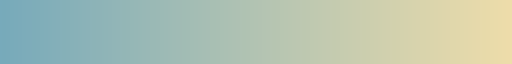

In [48]:
sns.color_palette("blend:#7AB,#EDA", as_cmap=True)


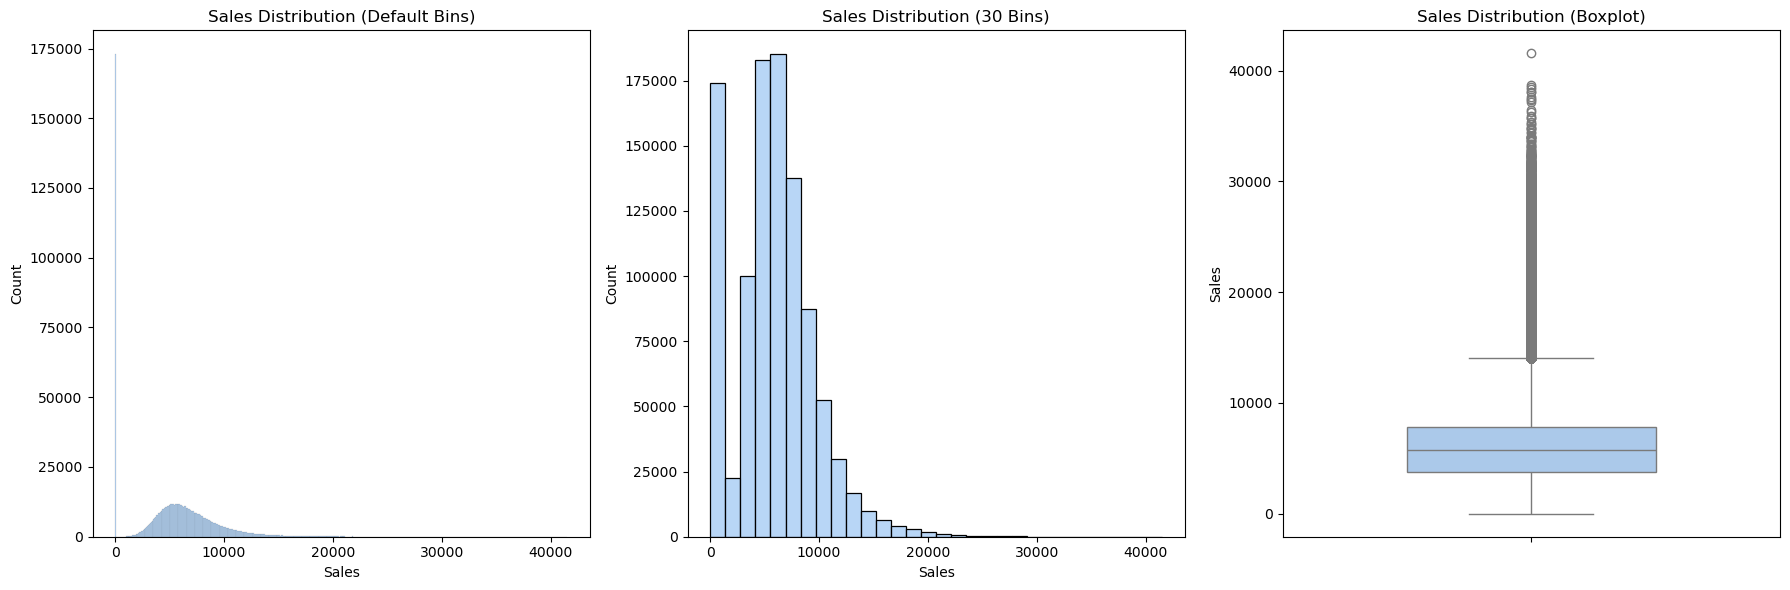

In [66]:

# Create a 1x3 subplot (1 row, 3 columns)
plt.figure(figsize=(18, 6))

# First subplot (Histogram for Sales with default bins)
plt.subplot(1, 3, 1)  # (rows, columns, position)
sns.histplot(combined_dataset['Sales'], kde=False).set(title='Sales Distribution (Default Bins)')

# Third subplot (Histogram for Sales with 30 bins)

plt.subplot(1, 3, 2)
sns.histplot(combined_dataset['Sales'], bins=30, kde=False).set(title='Sales Distribution (30 Bins)')

# Second subplot (Boxplot for Sales)
plt.subplot(1, 3, 3)
sns.boxplot(y=combined_dataset['Sales'], width=0.5).set(title="Sales Distribution (Boxplot)")

# Show all plots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


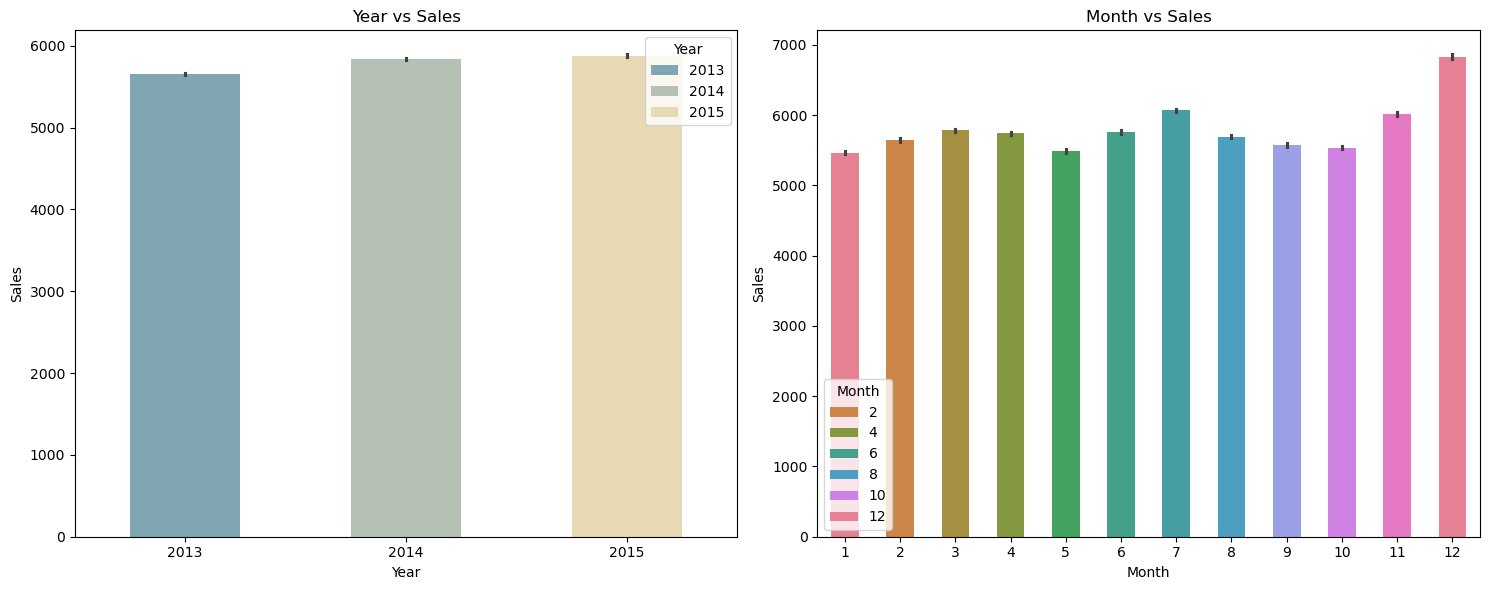

In [65]:

# Create a 1x2 subplot (1 row, 2 columns)
plt.figure(figsize=(15, 6))

# First subplot (Sales distribution by Year)
plt.subplot(1, 2, 1)  # (rows, columns, position)
sns.barplot(x='Year', y='Sales', data=combined_dataset, width=0.5, hue='Year', palette="blend:#7AB,#EDA").set(title='Year vs Sales')

# Second subplot (Sales distribution by Month)
plt.subplot(1, 2, 2)
sns.barplot(x='Month', y='Sales', data=combined_dataset, width=0.5, hue='Month', palette="husl").set(title='Month vs Sales')

# Show both plots
plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_41860\2042898057.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_dataset["StateHoliday"].loc[combined_dataset["StateHoliday"] == 0] = "0"


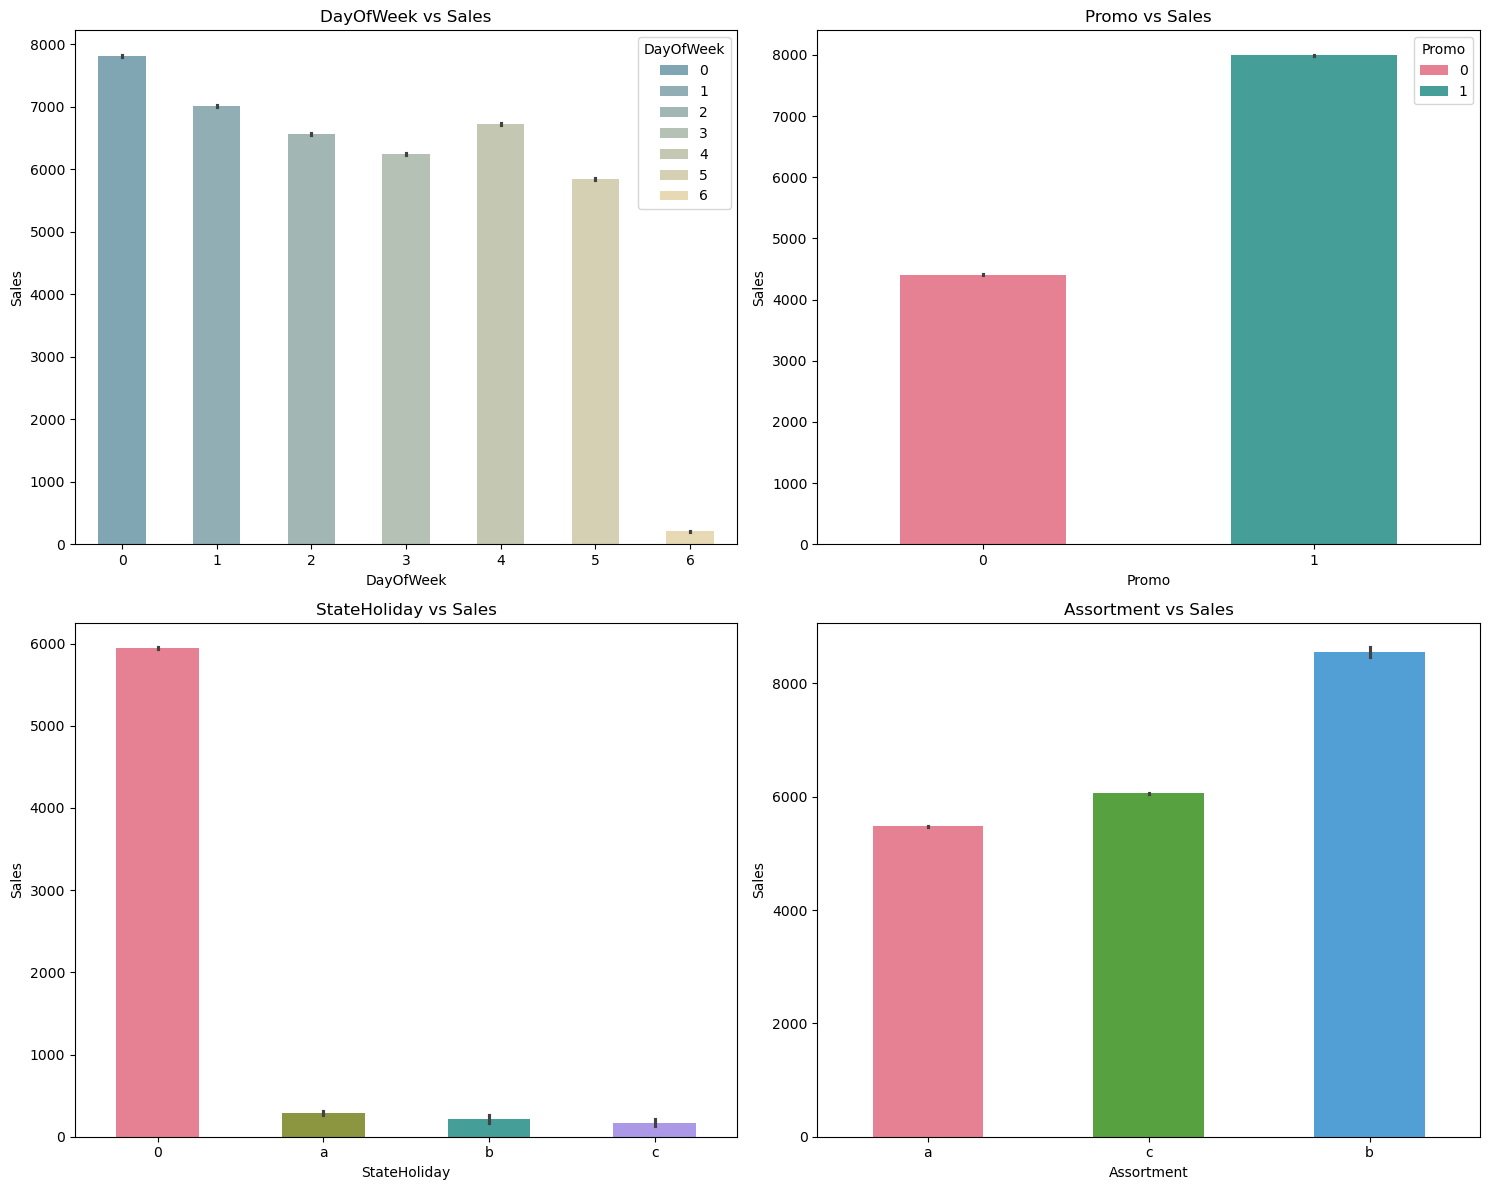

In [72]:

# Create a 2x2 subplot (2 rows, 2 columns)
plt.figure(figsize=(15, 12))

# First subplot (Sales distribution by DayOfWeek)
plt.subplot(2, 2, 1)  # (rows, columns, position)
sns.barplot(x='DayOfWeek', y='Sales', data=combined_dataset, width=0.5, hue='DayOfWeek', palette="blend:#7AB,#EDA").set(title='DayOfWeek vs Sales')

# Second subplot (Sales distribution by Promo)
plt.subplot(2, 2, 2)  # (rows, columns, position)
sns.barplot(x='Promo', y='Sales', data=combined_dataset, width=0.5, hue='Promo', palette="husl").set(title='Promo vs Sales')

# Third subplot (Sales distribution by StateHoliday)
combined_dataset["StateHoliday"].loc[combined_dataset["StateHoliday"] == 0] = "0"
plt.subplot(2, 2, 3)  # (rows, columns, position)
sns.barplot(x='StateHoliday', y='Sales', data=combined_dataset, width=0.5, hue='StateHoliday', palette="husl").set(title='StateHoliday vs Sales')

# Fourth subplot (Sales distribution by Month)
plt.subplot(2, 2, 4)  # (rows, columns, position)
sns.barplot(x='Assortment', y='Sales', data=combined_dataset, width=0.5, hue='Assortment', palette="husl").set(title='Assortment vs Sales')

# Show all plots
plt.tight_layout()
plt.show()

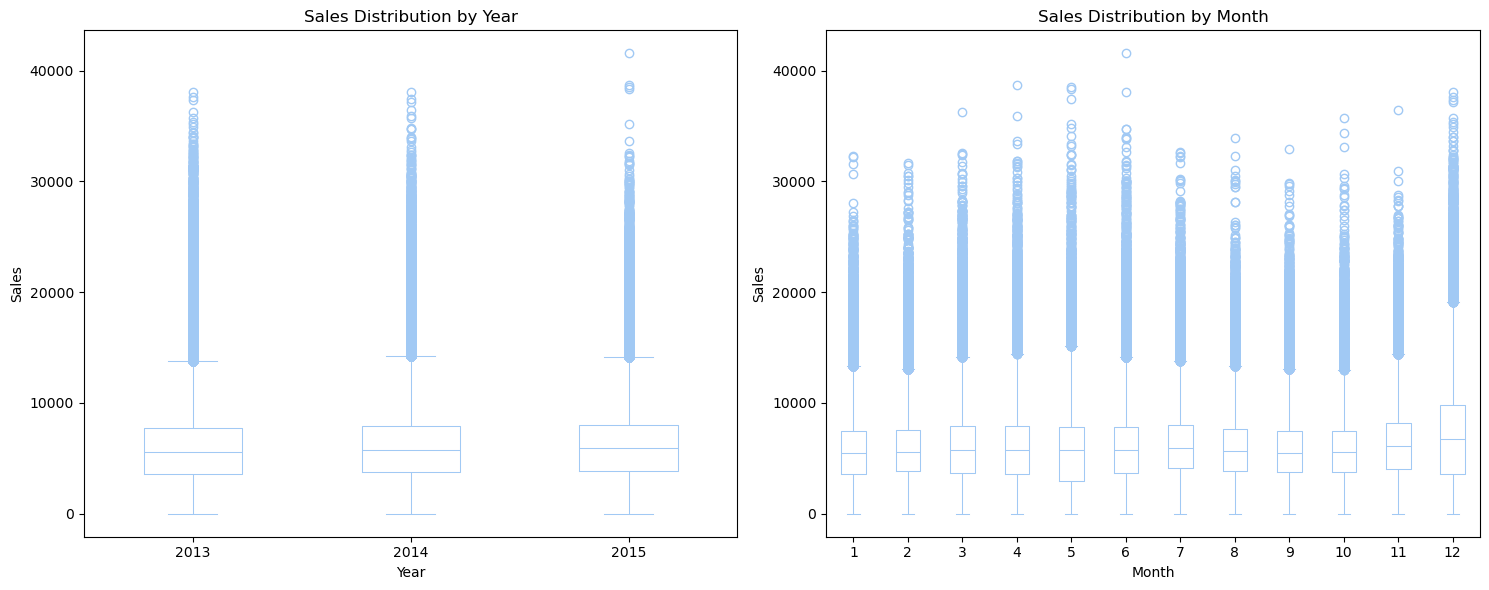

In [55]:
# Create a 1x2 subplot (1 row, 2 columns)
plt.figure(figsize=(15, 6))

# First subplot (Sales distribution by Year)
plt.subplot(1, 2, 1)  # (rows, columns, position)
sns.boxplot(x='Year', y='Sales', data=combined_dataset, fill=False, gap=.1, linecolor="#137", linewidth=.75, width=.5)
plt.title('Sales Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Sales')

# Second subplot (Sales distribution by Month)
plt.subplot(1, 2, 2)
sns.boxplot(x='Month', y='Sales', data=combined_dataset, fill=False, gap=.1, linecolor="#137", linewidth=.75, width=.5)
plt.title('Sales Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Sales')

# Show both plots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


##### Most stores are closed on State Holidays that's why we can see that there are very less sales in a,b,c where:
* a = Public Holiday
* b = Easter Holiday
* c = Chirstmas 
* 0 = No Holiday, Working day

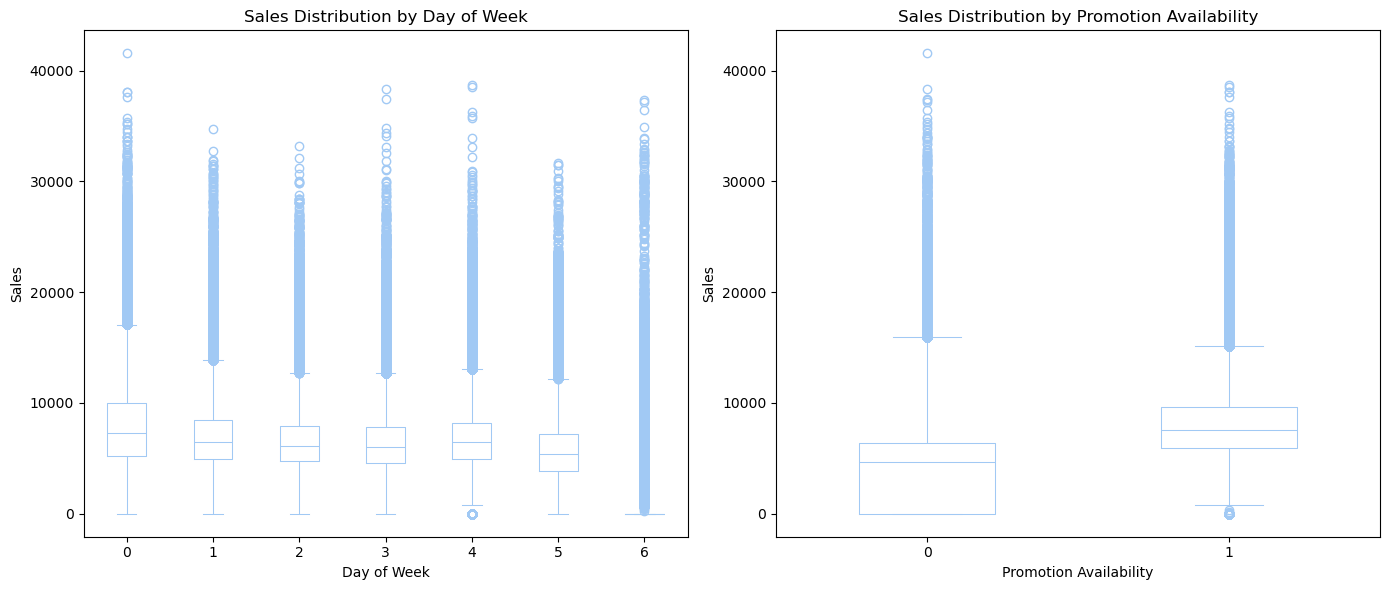

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(x='DayOfWeek', y='Sales', data=combined_dataset,
            fill=False, gap=.1, linecolor="#137", linewidth=.75, width=.5, ax=axes[0])
axes[0].set_title('Sales Distribution by Day of Week')
axes[0].set_xlabel('Day of Week')
axes[0].set_ylabel('Sales')

sns.boxplot(x='Promo', y='Sales', data=combined_dataset,
            fill=False, gap=.1, linecolor="#137", linewidth=.75, width=.5, ax=axes[1])
axes[1].set_title('Sales Distribution by Promotion Availability')
axes[1].set_xlabel('Promotion Availability')
axes[1].set_ylabel('Sales')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

## 3. Data Preparation

### 3.1. Handle missing values

### 3.2. Handle Outliers

### 3.3. Explore exceptional cases

## 4. Modeling

## 5. Evaluation